In [25]:
%matplotlib inline

import scipy.ndimage
import xarray
import numpy
import datacube
from datacube.storage.masking import make_mask
from datacube.storage.masking import mask_invalid_data
from dea_tools.datahandling import load_ard


import sys
sys.path.insert(1, '../Tools/')
from dea_tools.plotting import rgb

import matplotlib.pyplot as plt
plt.rcParams["axes.facecolor"] = "magenta" 

In [26]:
dc = datacube.Datacube(app='LS-cloud-buffering')

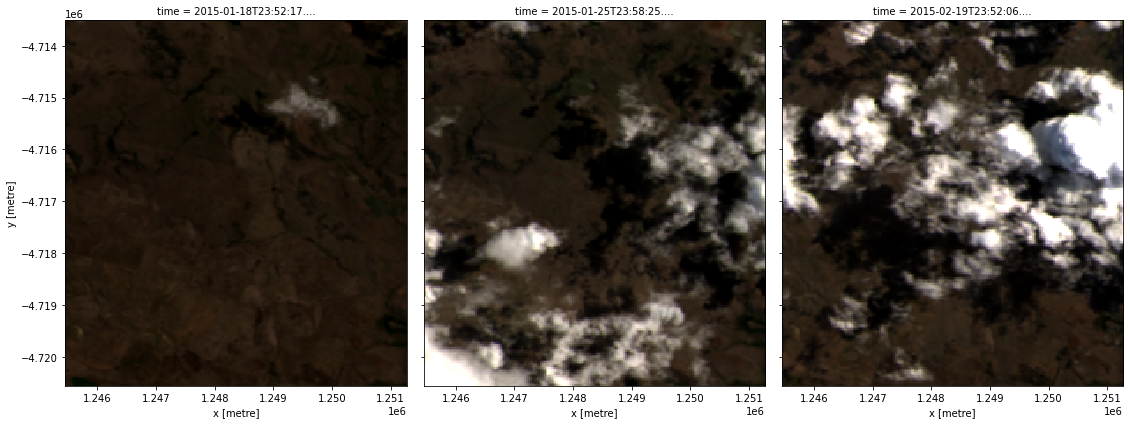

In [27]:
# Create a reusable query
y, x = -42.49, 146.79
radius = 0.03
query = {"x": (x-radius, x+radius), 
         "y": (y-radius, y+radius), 
         "time": ("2015")}

# Load data from the Sentinel 2 satellite
data = dc.load(product="ga_ls8c_ard_3",
               measurements=["nbart_blue", "nbart_green", "nbart_red", "fmask"],
               output_crs="EPSG:3577",
               resolution=[-30, 30],
               resampling={"fmask": "nearest", "*": "average"},
               group_by='solar_day',
               **query)

timesteps = [2, 3, 5]
rgb(data, index=timesteps)

In [28]:
import numpy as np
data.fmask.attrs['flags_definition']

{'fmask': {'bits': [0, 1, 2, 3, 4, 5, 6, 7],
  'values': {'0': 'nodata',
   '1': 'valid',
   '2': 'cloud',
   '3': 'shadow',
   '4': 'snow',
   '5': 'water'},
  'description': 'Fmask'}}

In [29]:
# Create separate masks for cloud and shadow
cloud_mask = make_mask(data.fmask, fmask="cloud")
cloud_shadow_mask = make_mask(data.fmask, fmask="shadow")    

In [34]:
from odc.algo import mask_cleanup, erase_bad

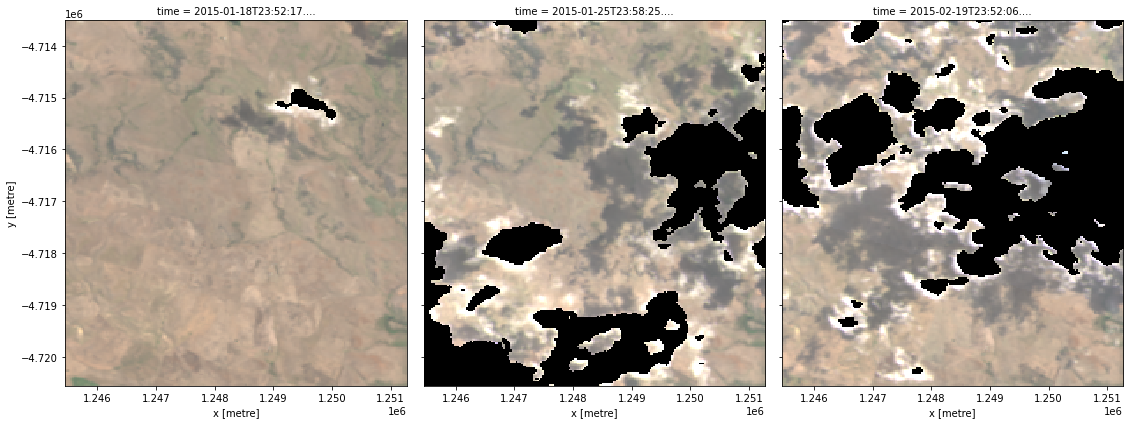

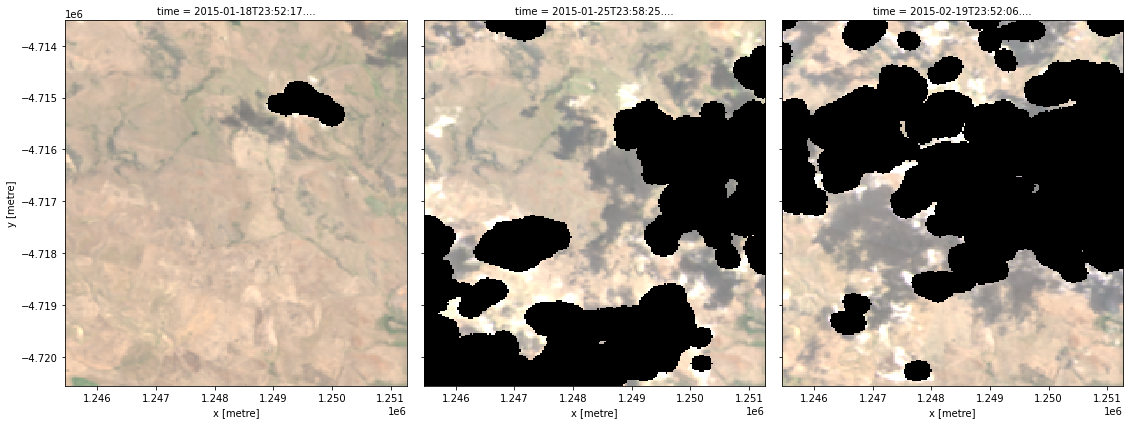

In [35]:
for cloud_dilation_sz in [0, 5]:
    cloud_shadow_buffered = mask_cleanup(mask=cloud_mask,
                                         mask_filters=[("dilation", cloud_dilation_sz)])
    rgb(erase_bad(data, cloud_shadow_buffered), index=timesteps)

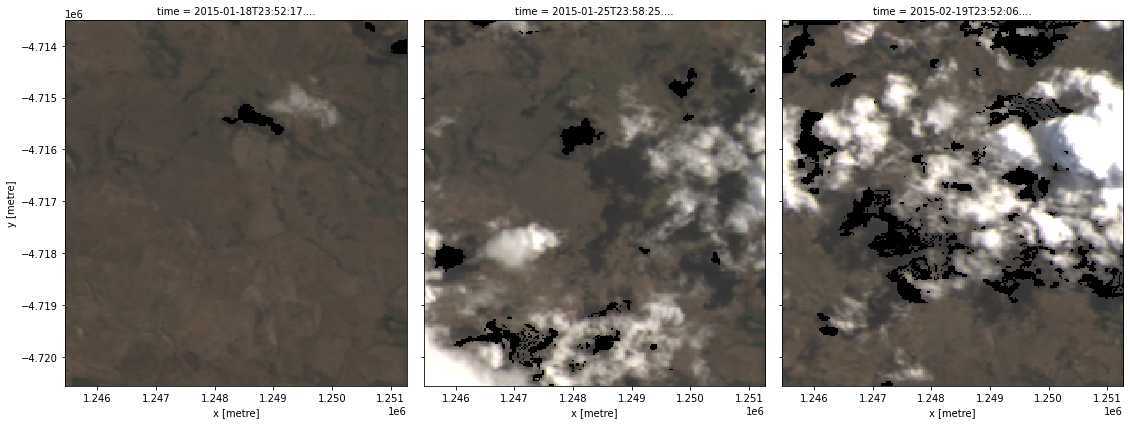

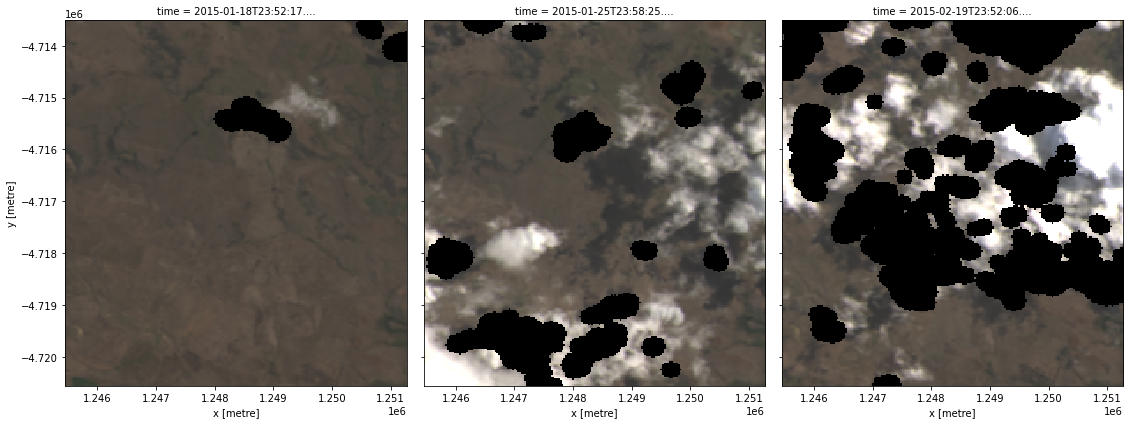

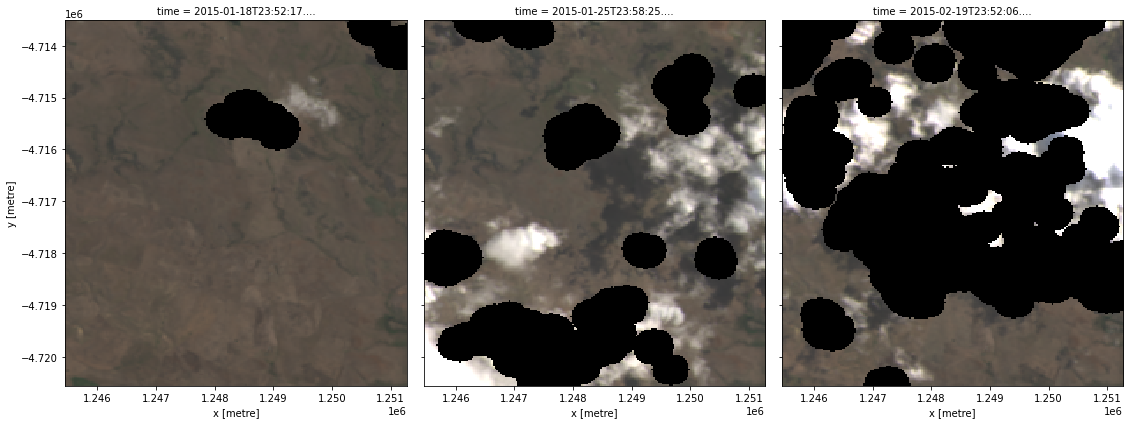

In [36]:
for cloud_dilation_sz in [0, 5, 10]:
    cloud_shadow_buffered = mask_cleanup(mask=cloud_shadow_mask,
                                     mask_filters=[("dilation", cloud_dilation_sz)])
    rgb(erase_bad(data, cloud_shadow_buffered), index=timesteps)